In [ ]:
pip install wget


  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=f97b2dd5c5b91b95db085c58f291e4b615cd1f885976912db747f3c45bd91036
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
url = 'https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
import wget

In [ ]:
filename =wget.download(url)

In [ ]:
import tensorflow as tf 
def swish(x):
  return x*tf.sigmoid(x)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(filename)

for layer in pre_trained_model.layers:
      layer.trainable = False

#pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation=swish)(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
cd /content/drive/My Drive/dataset1

/content/drive/My Drive/dataset1


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root_path = r'/content/drive/My Drive/dataset1'

train_dir = os.path.join(root_path, 'train')
validation_dir = os.path.join(root_path, 'validation')

train_fat_dir = os.path.join(train_dir, 'fatigue')  # directory with our training fat pictures
train_nofat_dir = os.path.join(train_dir, 'non fatigue')  # directory with our training nofat pictures
validation_fat_dir = os.path.join(validation_dir, 'fatigue')  # directory with our validation fat pictures
validation_nofat_dir = os.path.join(validation_dir, 'non fatigue')  # directory with our validation nofat pictures

num_fat_tr = len(os.listdir(train_fat_dir))
num_nofat_tr = len(os.listdir(train_nofat_dir))

num_fat_val = len(os.listdir(validation_fat_dir))
num_nofat_val = len(os.listdir(validation_nofat_dir))

total_train = num_fat_tr + num_nofat_tr
total_val = num_fat_val + num_nofat_val

print('total training fat images:', num_fat_tr)
print('total training nofat images:', num_nofat_tr)

print('total validation fat images:', num_fat_val)
print('total validation nofat images:', num_nofat_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_image_generator.flow_from_directory(train_dir,
                                                    batch_size = 128,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  validation_image_generator.flow_from_directory( validation_dir,
                                                          batch_size  = 128,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

total training fat images: 3705
total training nofat images: 9187
total validation fat images: 718
total validation nofat images: 2162
--
Total training images: 12892
Total validation images: 2880
Found 12892 images belonging to 2 classes.
Found 2880 images belonging to 2 classes.


In [ ]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = total_train // 128,
            epochs = 20,
            validation_steps = total_val // 128)

Epoch 1/20
100/100 [==============================] - 53s 527ms/step - loss: 0.0050 - accuracy: 0.9982 - val_loss: 0.5046 - val_accuracy: 0.9052
Epoch 2/20
100/100 [==============================] - 53s 530ms/step - loss: 0.0055 - accuracy: 0.9983 - val_loss: 0.5519 - val_accuracy: 0.8999
Epoch 3/20
100/100 [==============================] - 53s 526ms/step - loss: 0.0075 - accuracy: 0.9976 - val_loss: 0.5707 - val_accuracy: 0.9002
Epoch 4/20
100/100 [==============================] - 54s 540ms/step - loss: 0.0122 - accuracy: 0.9962 - val_loss: 0.5700 - val_accuracy: 0.8874
Epoch 5/20
100/100 [==============================] - 53s 532ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.6074 - val_accuracy: 0.8970
Epoch 6/20
100/100 [==============================] - 53s 527ms/step - loss: 0.0042 - accuracy: 0.9988 - val_loss: 0.5953 - val_accuracy: 0.8988
Epoch 7/20
100/100 [==============================] - 53s 532ms/step - loss: 0.0089 - accuracy: 0.9976 - val_loss: 0.5520 - val_ac

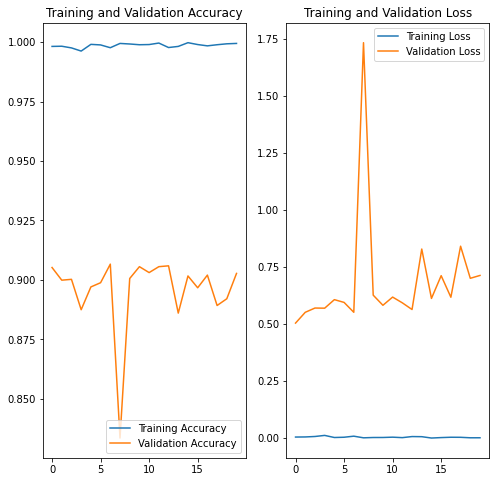

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
epochs =20
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save('/content/drive/My Drive/saved_model/modeltransfertlearning')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/My Drive/saved_model/modeltransfertlearning/assets
